In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import mlflow

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [109]:
mlflow.set_tracking_uri('http://localhost:5000')
mlflow.set_experiment('Breast Cancer Classification')
# mlflow.sklearn.autolog()

<Experiment: artifact_location='mlflow-artifacts:/470355747445830268', creation_time=1727673903375, experiment_id='470355747445830268', last_update_time=1727673903375, lifecycle_stage='active', name='Breast Cancer Classification', tags={}>

In [110]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<Axes: >

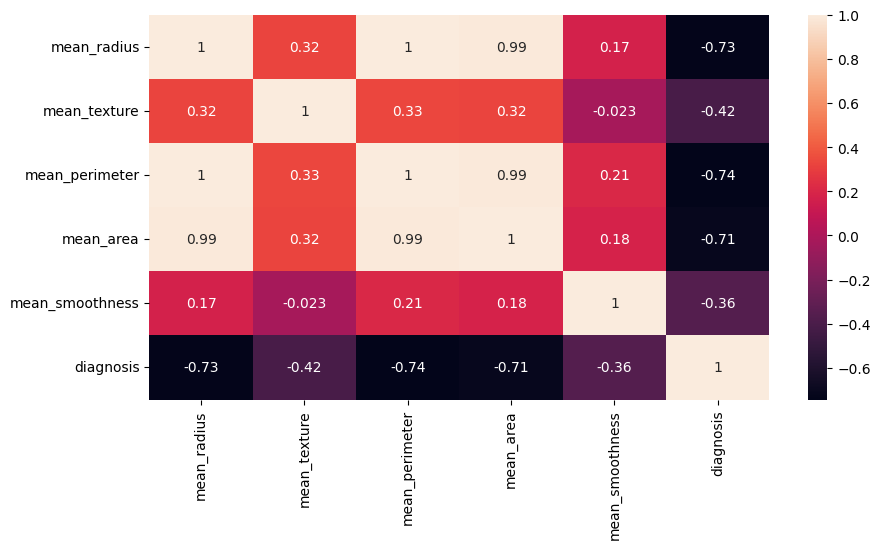

In [111]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)


<Axes: xlabel='diagnosis', ylabel='count'>

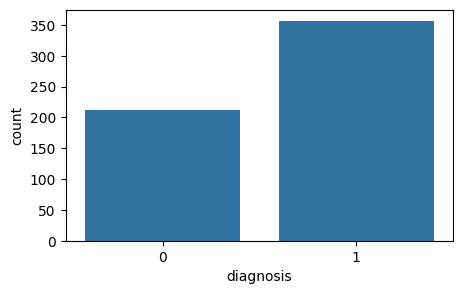

In [112]:
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=df)


<Axes: xlabel='mean_radius', ylabel='mean_texture'>

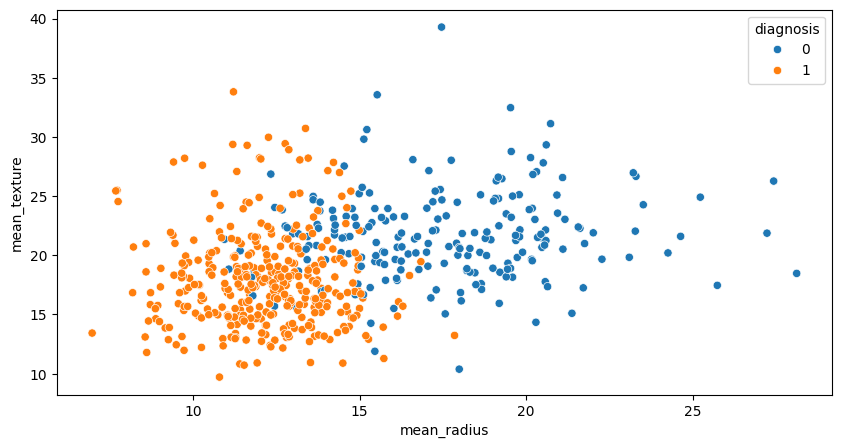

In [113]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='mean_radius', y='mean_texture', hue='diagnosis', data=df)


<Axes: xlabel='mean_area', ylabel='mean_smoothness'>

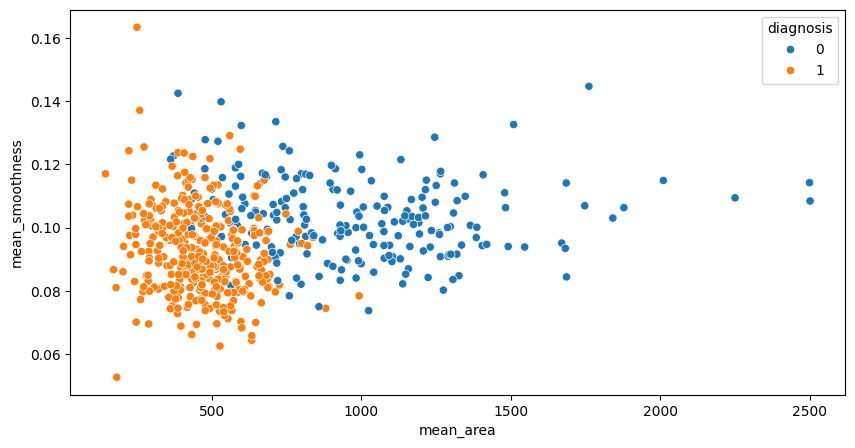

In [114]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='mean_area', y='mean_smoothness', hue='diagnosis', data=df)


<Axes: xlabel='mean_perimeter', ylabel='mean_area'>

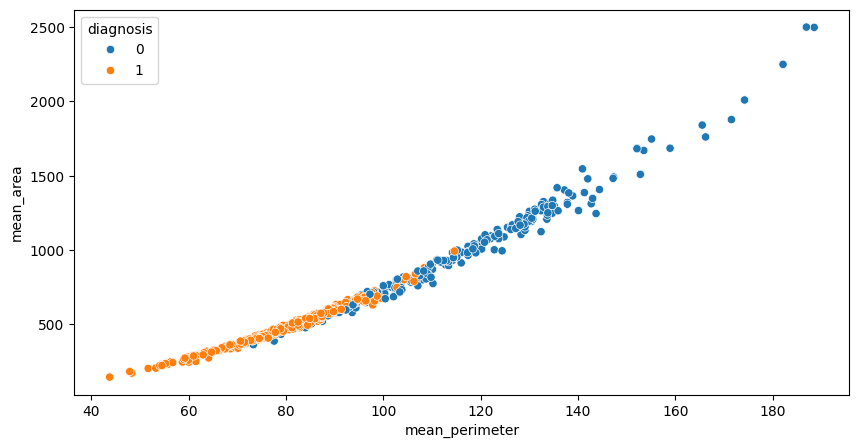

In [115]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='mean_perimeter', y='mean_area', hue='diagnosis', data=df)

<Axes: xlabel='mean_area', ylabel='mean_radius'>

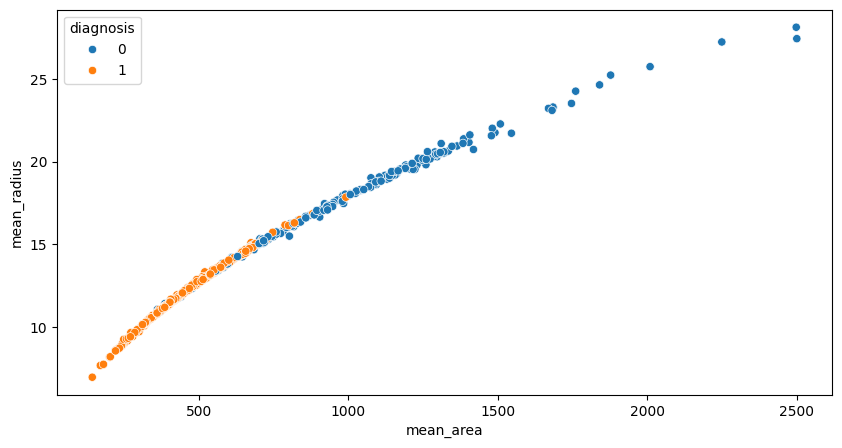

In [116]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='mean_area', y='mean_radius', hue='diagnosis', data=df)


<Axes: xlabel='mean_perimeter', ylabel='mean_radius'>

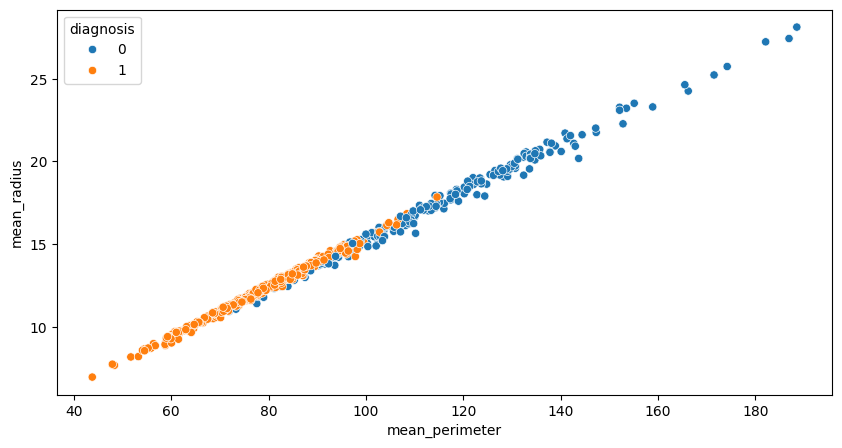

In [117]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='mean_perimeter', y='mean_radius', hue='diagnosis', data=df)

In [118]:
features = ['mean_radius', 'mean_texture', 'mean_smoothness']


In [119]:
X = df.drop(['diagnosis'], axis=1)
X = X[features]
y = df['diagnosis']


In [120]:
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


In [121]:
scaler = StandardScaler()
scaler.fit(X_train)

# mlflow.log_artifact('scaler.pkl', scaler)

StandardScaler()

In [122]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [123]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, hyperparams={}):
    with mlflow.start_run(run_name=model_name, nested=True):
        
        mlflow.log_param('features', features)
        mlflow.log_param('scaler', 'StandardScaler')
        mlflow.log_param('test_size', test_size)
        mlflow.log_param('random_state', random_state)
        mlflow.log_param('model', model_name)
        mlflow.log_params(hyperparams)
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        mlflow.log_metric('train_score', train_score)
        mlflow.log_metric('test_score', test_score)
        y_pred = model.predict(X_test)
        train_pred = model.predict(X_train)
        mlflow.log_metrics({
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred),
            'train_accuracy': accuracy_score(y_train, train_pred),
            'train_precision': precision_score(y_train, train_pred),
            'train_recall': recall_score(y_train, train_pred),
            'train_f1': f1_score(y_train, train_pred),
            'train_roc_auc': roc_auc_score(y_train, train_pred),
        })
        return model
    
    # model.fit(X_train, y_train)
    # print(f"Train score: {model.score(X_train, y_train)}")
    # print(f"Test score: {model.score(X_test, y_test)}")
    # y_pred = model.predict(X_test)
    # train_pred = model.predict(X_train)
    # print(confusion_matrix(y_test, y_pred))
    # print(classification_report(y_test, y_pred))
    # print(confusion_matrix(y_train, train_pred))
    # print(classification_report(y_train, train_pred))

In [124]:
params = {'C': 1.0, 'max_iter': 1000}
model = LogisticRegression( **params)
evaluate_model(model, X_train, X_test, y_train, y_test, 'Logistic Regression', params)

2024/09/30 11:08:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression at: http://localhost:5000/#/experiments/470355747445830268/runs/a79d2c4ec02d488f91f22898f7409c2c.
2024/09/30 11:08:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/470355747445830268.


LogisticRegression(max_iter=1000)

In [125]:
params = {'n_estimators': 100, 'random_state': 42}

model = RandomForestClassifier( **params)
evaluate_model(model, X_train, X_test, y_train, y_test, 'Random Forest', params)

2024/09/30 11:08:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: http://localhost:5000/#/experiments/470355747445830268/runs/7302e0ba9c064a2c905f57dd936f5e58.
2024/09/30 11:08:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/470355747445830268.


RandomForestClassifier(random_state=42)

In [126]:
params = {'C': 1.0, 'kernel': 'rbf'}
model = SVC( **params)
evaluate_model(model, X_train, X_test, y_train, y_test, 'SVM', params)

2024/09/30 11:08:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM at: http://localhost:5000/#/experiments/470355747445830268/runs/abf58d1d0c404beeb732327a1331b8b9.
2024/09/30 11:08:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/470355747445830268.


SVC()

In [127]:
# with mlflow.start_run():
#     model = LogisticRegression()
#     model.fit(X_train, y_train)
#     mlflow.log_metric("train_score", model.score(X_train, y_train))
#     mlflow.log_metric("test_score", model.score(X_test, y_test))

#     model = RandomForestClassifier()
#     model.fit(X_train, y_train)
#     mlflow.log_metric("train_score", model.score(X_train, y_train))
#     mlflow.log_metric("test_score", model.score(X_test, y_test))

#     model = SVC()
#     model.fit(X_train, y_train)
#     mlflow.log_metric("train_score", model.score(X_train, y_train))
#     mlflow.log_metric("test_score", model.score(X_test, y_test))
    
#     mlflow.log_param("features", ['mean_radius', 'mean_texture', 'mean_smoothness'])
#     mlflow.log_param("test_size", 0.2)
#     mlflow.log_param("random_state", 42)
#     mlflow.log_param("scaler", 'StandardScaler')
#     mlflow.log_param("models", ['LogisticRegression', 'RandomForestClassifier', 'SVC'])
#     mlflow.log_param("model_params", {'LogisticRegression': {}, 'RandomForestClassifier': {}, 'SVC': {}})
    
#     mlflow.log_artifact('Breast_cancer_data.csv')

    